In [3]:
# Q1. How can you create a Bokeh plot using Python code?
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
!pip install bokeh

In [10]:
from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.iris import flowers

output_file("test.html")

p = figure(title = "simple bokeh")
p.xaxis.axis_label = "petal_length"
p.yaxis.axis_label = "petal_width"
p.circle(flowers['petal_length'],flowers['petal_width'])
show(p)

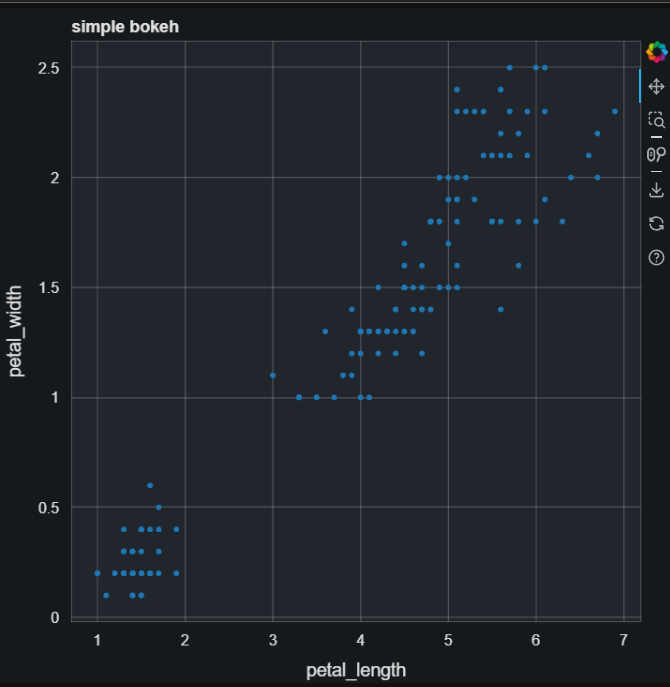

In [ ]:
# Q2. What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.
Ans.
glyphs are visual markers used to represent data points in a plot. They can be added to a Bokeh plot to
visualize and convey information effectively. Bokeh provides a variety of glyphs, such as circles,
squares, triangles, lines, and more.
To add glyphs to a Bokeh plot, you typically use the glyph methods provided by the figure object.

In [11]:
# Example
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook
from bokeh.plotting import figure, show, output_file

x = [1,2,3,4,5,6]
y = [20,40,60,70,80,90]

output_file("test1.html")
p = figure(title="Triangle plot")
p.xaxis.axis_label = "xaxis"
p.yaxis.axis_label = "yaxis"
# here i am giving the some of glyphs example
# p.triangle_pin(x,y,color = "orange", size = 20, alpha = 1.5)
# p.circle(x,y,color = "orange", size = 20, alpha = 1.5)
p.square(x,y,color = "orange", size = 20, alpha = 1.5)
p.line(x,y,color="red")
show(p)

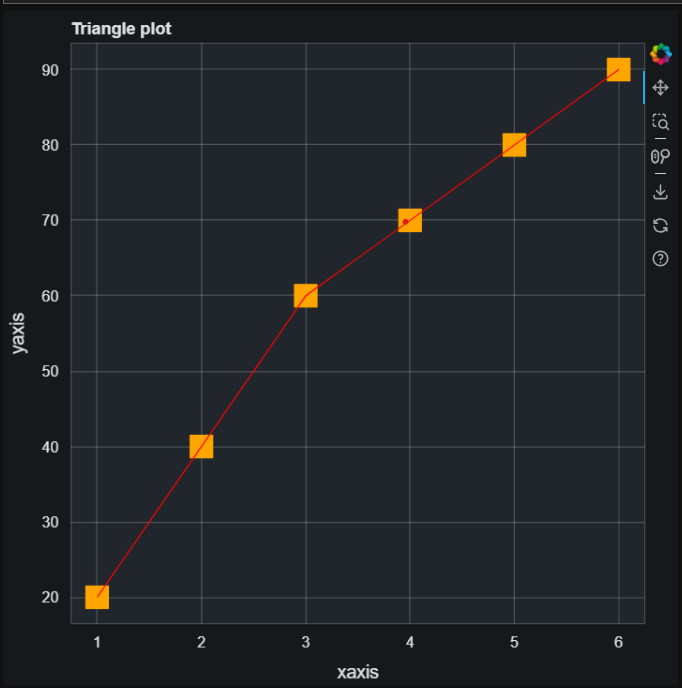

In [12]:
# Q3. How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook
from bokeh.plotting import figure, show, output_file

x = [1,2,3,4,5,6]
y = [3,8,9,10,6,15]
graph = figure(title = "Bokeh plot")
graph.xaxis.axis_label = "xaxis"
graph.yaxis.axis_label = "yaxis"
graph.square(x,y,legend_label = "red plotting", color = "red", size=15, alpha = 0.7)
show(graph)

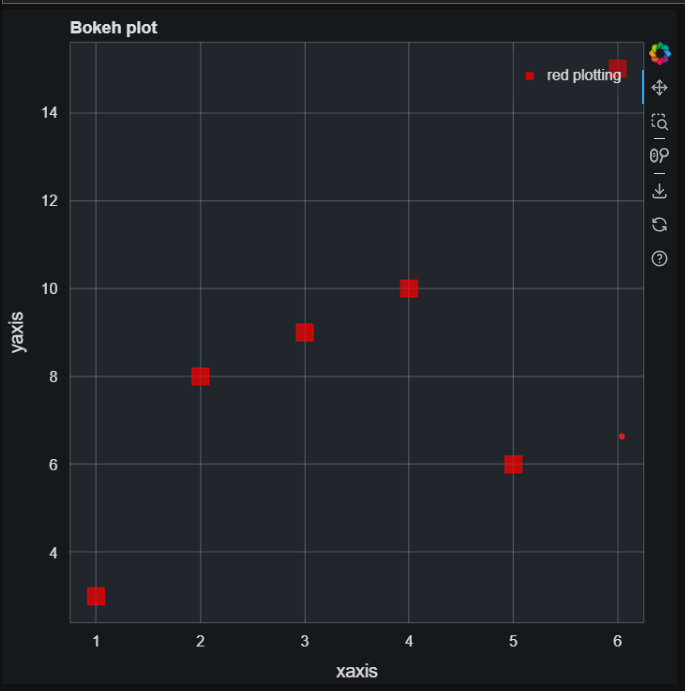

In [ ]:
# Q4. What is a Bokeh server, and how can you use it to create interactive plots that can be updated in
# real time?
The Bokeh server is a key feature of the Bokeh library that allows you to create interactive plots that
can be updated in real time.
The Bokeh server works by creating a connection between the Python runtime and the browser, allowing
bidirectional communication. This enables updates to the plot in response to user interactions or changes
in the data, making it possible to create dynamic and interactive visualizations.

In [13]:
from bokeh.plotting import figure, show, output_file, curdoc
from bokeh.models import Div, Spinner, TextInput
from bokeh.layouts import layout

x = [1,2,3,4,5,6,7,8,9,10]
y = [100,300,400,200,500,600,800,700,600,550]

curdoc().theme = "dark_minimal"

p = figure(title = "Scatter plot")
p.xaxis.axis_label = "xaxis"
p.yaxis.axis_label = "yaxis"
circle_glyph = p.circle(x,y,legend_label="Random points").glyph

div = Div(text= "<p> Select Size </p>")
spinner = Spinner(title = "Circle Size", low = 0, high = 20, step = 1, value = circle_glyph.size)
spinner.js_link("value", circle_glyph, "size")

textinput = TextInput(title = "Choose Color",value= circle_glyph.fill_color)
textinput.js_link("value", circle_glyph, "fill_color")

layout = layout([[div,spinner],[textinput],[p]])

show(layout)

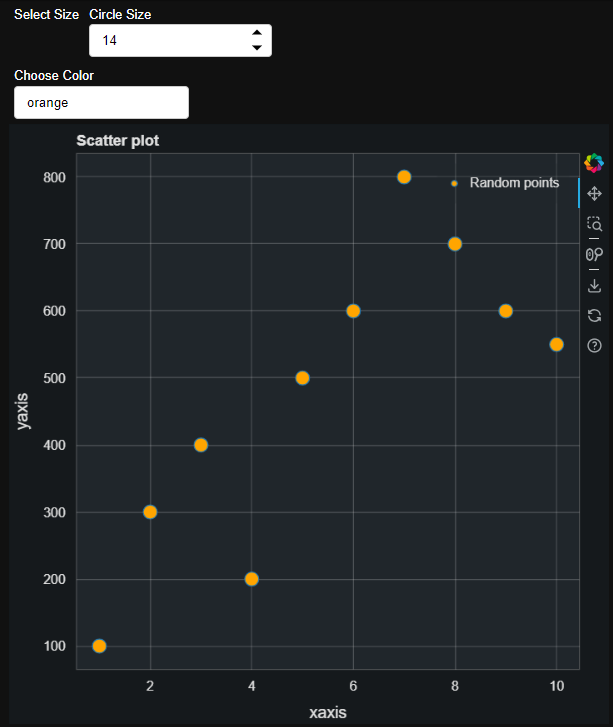

In [ ]:
# Q5. How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?
# Ans. 
# Bokeh using Flask 
# code :
from flask import Flask, render_template
from bokeh.plotting import figure 
from bokeh.resources import CDN
from bokeh.embed import file_html

app = Flask(__name__)

@app.route("/")
def index():
    # Create a Bokeh plot
    plot = figure(title = "Bokeh Plot", width=600, height=600)
    plot.xaxis.axis_label = "xaxis"
    plot.yaxis.axis_label = "yaxis"
    plot.circle([1,2,3,4,5,6,7,8,9,10],[100,300,400,200,500,500,390,280,300,100], 
    size=20, legend_label ="Random points", color="red")

    # Generate the Bokeh HTML file
    html = file_html(plot, CDN)

    # Render the web page with the embedded Bokeh plot
    return render_template("index.html", bokeh_html=html)

if __name__ == "__main__":
    app.run(host="0.0.0.0")

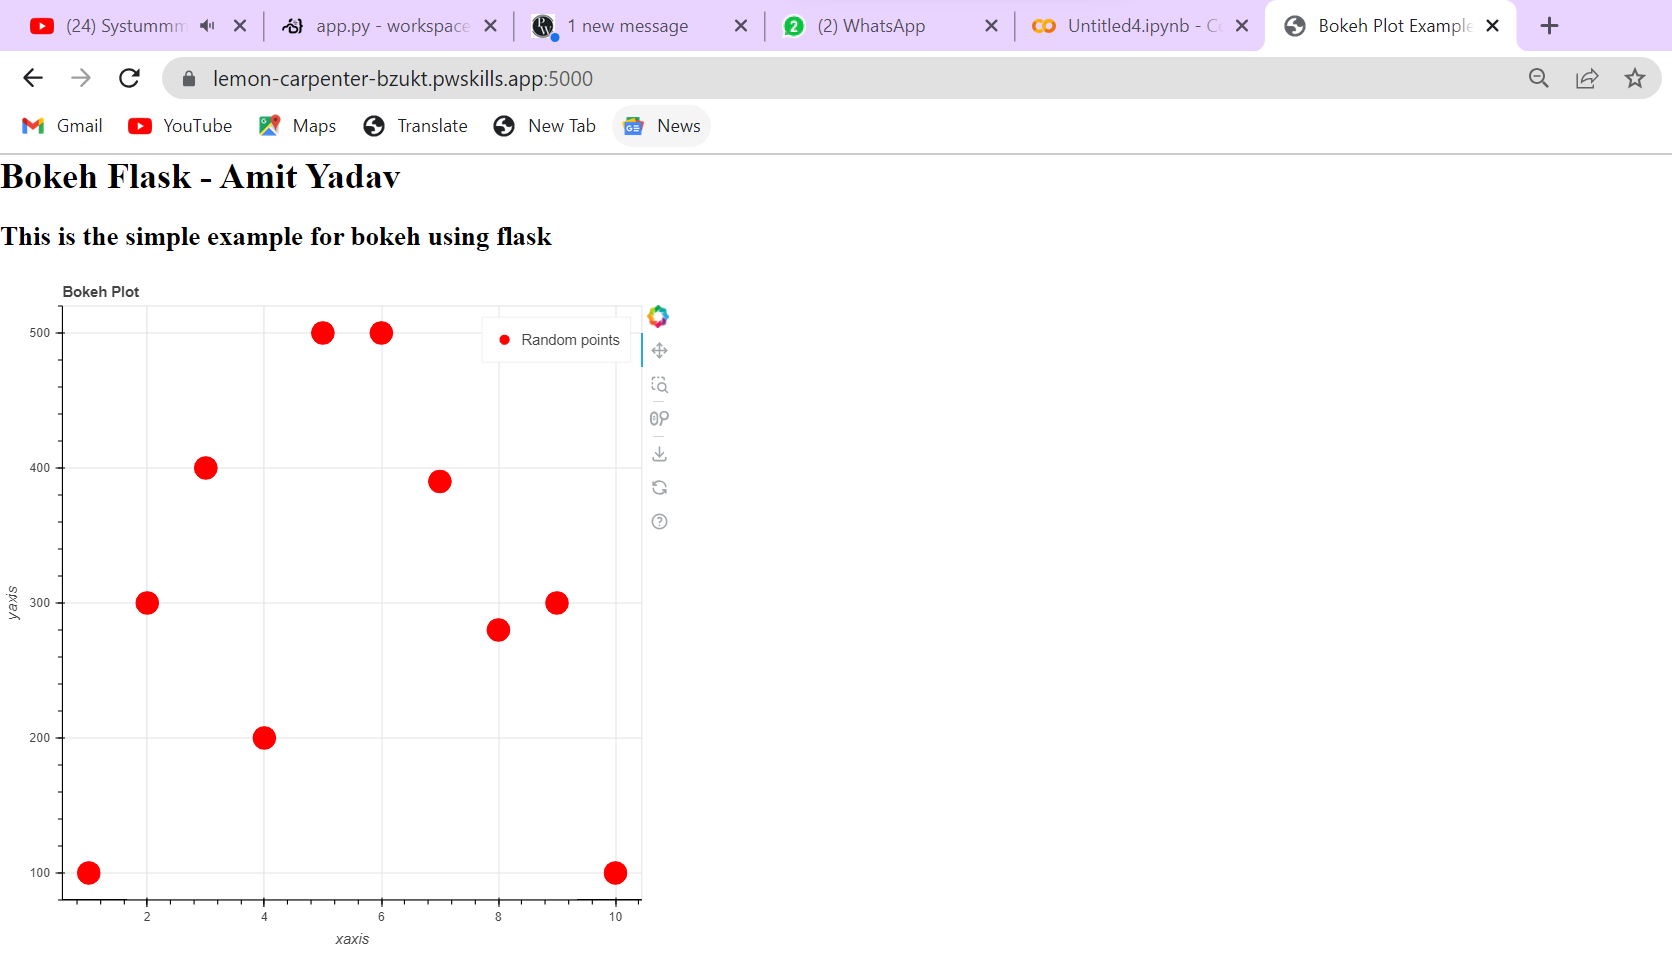

In [ ]:
## Html Code
# Html code 
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Bokeh Plot Example</title>
</head>
<body>
    <h1>Bokeh Flask - Amit Yadav</h1>
    <h2>This is the simple example for bokeh using flask</h2>  
</body>
    {{ bokeh_html|safe }}
</html>